### Q1

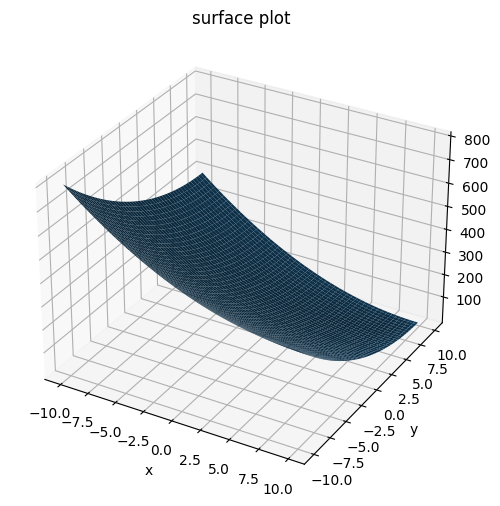

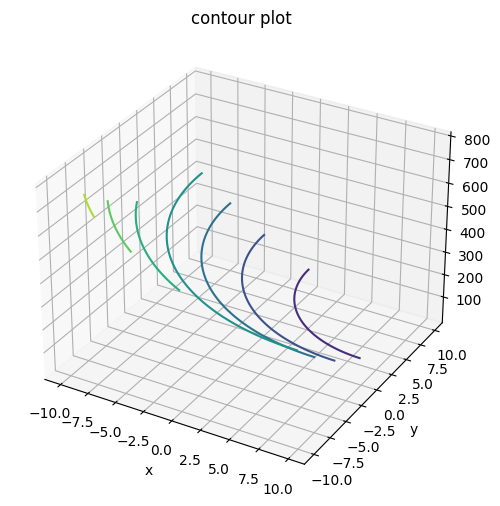

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
x,y = np.meshgrid(x,y)
z = (x-10)**2 + (y-10)**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection = "3d")
ax.plot_surface(x,y,z)
ax.set(xlabel="x", ylabel="y",zlabel="z",title = "surface plot")

fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(1,1,1,projection = "3d")
ax1.set(xlabel="x", ylabel="y", zlabel="z",title = "contour plot")
ax1.contour(x,y,z)

### Q2

Min lies between (2.9960000000000018, 3.004000000000002)


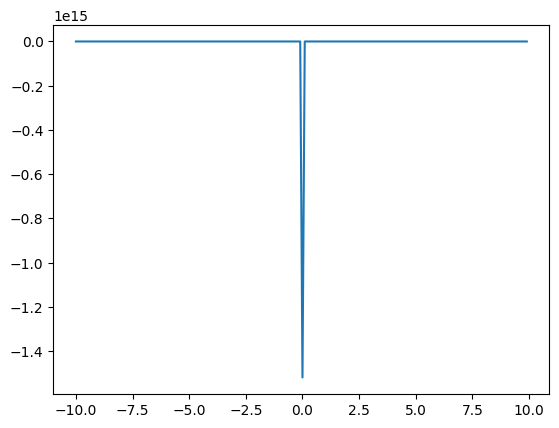

In [2]:

def F(w):
    Jw = w**2 + 54/w
    return  (Jw)

def F1(w):
    dw = 0.000001
    return (F(w+dw) - F(w))/dw
    
def F2(w):
    dw = 0.000001
    return (F1(w+dw) - F1(w))/dw

def Brackets(a,b,divisions,J):
    delta = (b-a)/divisions

    w1 = a
    w2 = w1 + delta
    w3 = w2 + delta
    n = 1
    while n<=divisions:
        if w3 <= b:
            if J(w1) > J(w2) < J(w3):
                min_range = (w1,w3)
                # print(f"min lies between {w1} and {w3}")
            
            else:
                w1 = w2
                w2 = w3
                w3 = w2 + delta
        
        else:
            print(f"no min lies between {a} and {b}")
        n+=1
    
    return (min_range)

optimal = Brackets(1,5,1000,F)
print(f"Min lies between {optimal}")

w = np.arange(-10,10,0.1)
plt.plot(w,F(w))


In [3]:
#Using interval halving method
def IntervalHalving(a,b,e,J):
    wm = (a + b) / 2
    L = b-a
    w1 = a + L/4
    w2 = b - L/4
    while abs(L) < e:
        if J(w1) < J(wm):
            b = wm 
            wm = w1
        elif J(w2) < J(wm):
            a = wm 
            wm = w2
        else:
            a = w1
            b = w2
        L = b-a
    return wm

critical_point = IntervalHalving(*optimal,0.00001,F)
print(f"Critical point is: ",critical_point)
print(f"range : ")




Critical point is:  3.0000000000000018
range : 


In [4]:
#Critical point using Newton-Raphson method


def NewtonRaphson(a,b,iterations,e,J1,J2):
    w1 = a
    w2 = w1 - J1(w1)/J2(w1)
    k = 1
    while k <= iterations:
        if abs(J1(w2) < e):
            return w2
        else:
            k +=1
            w1 = w2
            w2 = w1 - J1(w1)/J2(w1)

critical_points = NewtonRaphson(*optimal,100,0.01, F1,F2 )
print(critical_points)

2.9999950242173674


### Q3

In [5]:
import math
def F(w):
    Pw = -math.sin(w)
    return(Pw)

range_critical_point = Brackets(0,math.pi,10000,F)
print(f"Optimal range: ",range_critical_point)

critical_points_intervalhalving = IntervalHalving(*range_critical_point,0.0001,F)
print(f"Critical point using Interval Halving method: ",critical_points_intervalhalving)


critical_points_newtownraphson = NewtonRaphson(*range_critical_point,10,0.1,F1,F2)
print(f"Critical point using Newton Raphson method: ",critical_points_newtownraphson)


Optimal range:  (1.5704821675296132, 1.5711104860603313)
Critical point using Interval Halving method:  1.5707963267949723
Critical point using Newton Raphson method:  1.5707958685067396


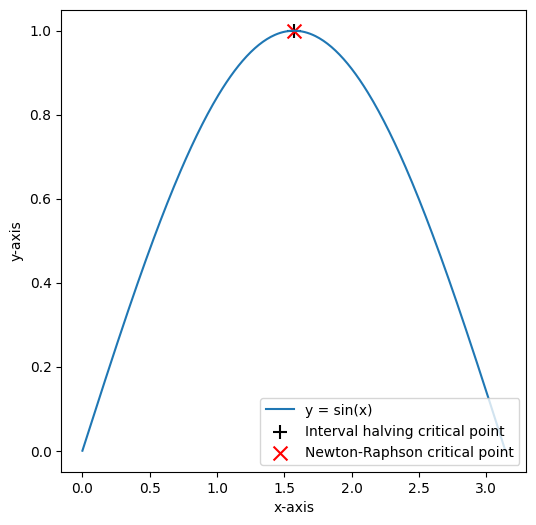

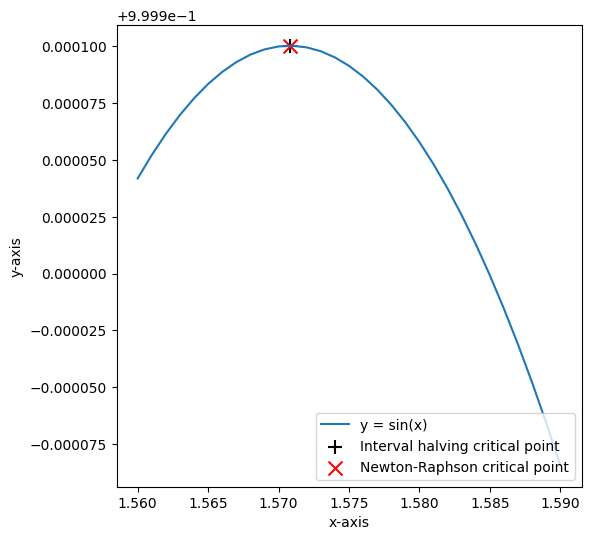

In [6]:
w = np.arange(0,math.pi,0.01)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(w,np.sin(w))
ax.set(xlabel="x-axis", ylabel="y-axis")


ax.scatter(critical_points_intervalhalving,np.sin(critical_points_intervalhalving), marker="+",color = "black",s=100)
ax.scatter(critical_points_newtownraphson,np.sin(critical_points_newtownraphson),marker="x",color="red",s=100)
plt.legend(["y = sin(x)", "Interval halving critical point","Newton-Raphson critical point"], loc ="lower right")
plt.show()

w = np.arange(1.56,1.59,0.001)
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(w,np.sin(w))
ax.set(xlabel="x-axis", ylabel="y-axis")


ax.scatter(critical_points_intervalhalving,np.sin(critical_points_intervalhalving), marker="+",color = "black",s=100)
ax.scatter(critical_points_newtownraphson,np.sin(critical_points_newtownraphson),marker="x",color="red",s=100)
plt.legend(["y = sin(x)", "Interval halving critical point","Newton-Raphson critical point"], loc ="lower right")
plt.show()